# 데이터 불러오기

In [ ]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.font_manager as fm
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df        = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/13.데이터톤/최종합본_final.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.drop(['총구매금액'], axis=1, inplace=True)   # 다시 계산해서 생성할 예정
df.head(2)

,주문 고유 ID,고객 ID,주문 상태,구매 시간,물류 처리 시간,실제 배송 날짜,기대 배송 날짜,고객 고유 ID,우편번호 앞부분,도시,...,리뷰 답변 시간,카테고리 이름,제품 무게(g),제품 길이(cm),제품 높이(cm),제품 너비(cm),상위 카테고리,판매자 우편번호 앞자리,판매자 도시(city),판매자 주(state)
0,ORDER_00000,CUSTOMER_62232,delivered,2018-10-02 10:56:33,2018-10-04 19:55:00,2018-10-10 21:25:13,2018-10-18,CUSTOMER_Unique_60785,3149,sao paulo,...,2018-10-12,home_utilities,500.0,19.0,8.0,13.0,home,9350.0,maua,SP
1,ORDER_00000,CUSTOMER_62232,delivered,2018-10-02 10:56:33,2018-10-04 19:55:00,2018-10-10 21:25:13,2018-10-18,CUSTOMER_Unique_60785,3149,sao paulo,...,2018-10-12,home_utilities,500.0,19.0,8.0,13.0,home,9350.0,maua,SP


In [ ]:
df.columns

Index(['주문 고유 ID', '고객 ID', '주문 상태', '구매 시간', '물류 처리 시간', '실제 배송 날짜',
       '기대 배송 날짜', '고객 고유 ID', '우편번호 앞부분', '도시', '주', '주 한국명', '지역', '고객 위도',
       '고객 경도', '주문 품목 수', '제품 고유 ID', '판매자 고유 ID', '판매 가격', '품목 화물 가격',
       '결제 시퀀스', '지불 방법 ', '할부 횟수', '거래 금액', '리뷰 고유 ID', '리뷰 점수', '리뷰 생성 시간',
       '리뷰 답변 시간', '카테고리 이름', '제품 무게(g)', '제품 길이(cm)', '제품 높이(cm)',
       '제품 너비(cm)', '상위 카테고리', '판매자 우편번호 앞자리', '판매자 도시(city)', '판매자 주(state)'],
      dtype='object')

# 데이터 전처리

In [ ]:
# 날짜 타입 변경
df['구매 시간']      = pd.to_datetime(df['구매 시간']).astype('datetime64[ns]')
df['물류 처리 시간'] = pd.to_datetime(df['물류 처리 시간']).astype('datetime64[ns]')
df['실제 배송 날짜'] = pd.to_datetime(df['실제 배송 날짜']).astype('datetime64[ns]')
df['기대 배송 날짜'] = pd.to_datetime(df['기대 배송 날짜']).astype('datetime64[ns]')
df['리뷰 생성 시간'] = pd.to_datetime(df['리뷰 생성 시간']).astype('datetime64[ns]')
df['리뷰 답변 시간'] = pd.to_datetime(df['리뷰 답변 시간']).astype('datetime64[ns]')

In [ ]:
# 결측치 확인
df.isnull().sum()

주문 고유 ID          0
고객 ID             0
주문 상태             0
구매 시간             0
물류 처리 시간          0
실제 배송 날짜          0
기대 배송 날짜          0
고객 고유 ID          0
우편번호 앞부분          0
도시                0
주                 0
주 한국명           323
지역              323
고객 위도           323
고객 경도           323
주문 품목 수           1
제품 고유 ID          1
판매자 고유 ID         1
판매 가격             1
품목 화물 가격          1
결제 시퀀스            1
지불 방법             1
할부 횟수             1
거래 금액             1
리뷰 고유 ID        810
리뷰 점수           810
리뷰 생성 시간        810
리뷰 답변 시간        810
카테고리 이름          21
제품 무게(g)         21
제품 길이(cm)        21
제품 높이(cm)        21
제품 너비(cm)        21
상위 카테고리          21
판매자 우편번호 앞자리      1
판매자 도시(city)      1
판매자 주(state)      1
dtype: int64

In [ ]:
# 결측치 있는 행 삭제
df.drop(32703, axis=0, inplace=True)

In [ ]:
# 총구매금액 계산 (고객별로 거래 금액을 합산) 후 컬럼 추가
df['총구매금액'] = df.groupby('고객 ID')['거래 금액'].transform('sum')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105766 entries, 0 to 105766
Data columns (total 38 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   주문 고유 ID      105766 non-null  object        
 1   고객 ID         105766 non-null  object        
 2   주문 상태         105766 non-null  object        
 3   구매 시간         105766 non-null  datetime64[ns]
 4   물류 처리 시간      105766 non-null  datetime64[ns]
 5   실제 배송 날짜      105766 non-null  datetime64[ns]
 6   기대 배송 날짜      105766 non-null  datetime64[ns]
 7   고객 고유 ID      105766 non-null  object        
 8   우편번호 앞부분      105766 non-null  int64         
 9   도시            105766 non-null  object        
 10  주             105766 non-null  object        
 11  주 한국명         105443 non-null  object        
 12  지역            105443 non-null  object        
 13  고객 위도         105443 non-null  float64       
 14  고객 경도         105443 non-null  float64       
 15  주문 품목 수       105766 n

# R 분석

- 고객이 최근에 구매했는가
    - 고객별 최근 구매 일자 확인
        - R지표 = 전체데이터 중 가장 구매일자 - 고객별 최근 구매일자

In [ ]:
# Recency 분석을 위한 데이터 추출
df_user = pd.DataFrame(df['고객 고유 ID']).drop_duplicates()
df_max_purchase = df.groupby('고객 고유 ID')['구매 시간'].max().reset_index()
df_max_purchase.rename(columns={'구매 시간': 'maxPurchaseDate'},inplace=True)

# 가장 최근 구매 일자 - 고객번호별 최근 구매일자
df_max_purchase['recency'] = (df_max_purchase['maxPurchaseDate'].max() - df_max_purchase['maxPurchaseDate']).dt.days
recency_df = pd.merge(df_user, df_max_purchase, on='고객 고유 ID')

recency_df.recency.describe()

count    85111.000000
mean       227.969158
std        143.225912
min          0.000000
25%        110.000000
50%        206.000000
75%        331.000000
max        664.000000
Name: recency, dtype: float64

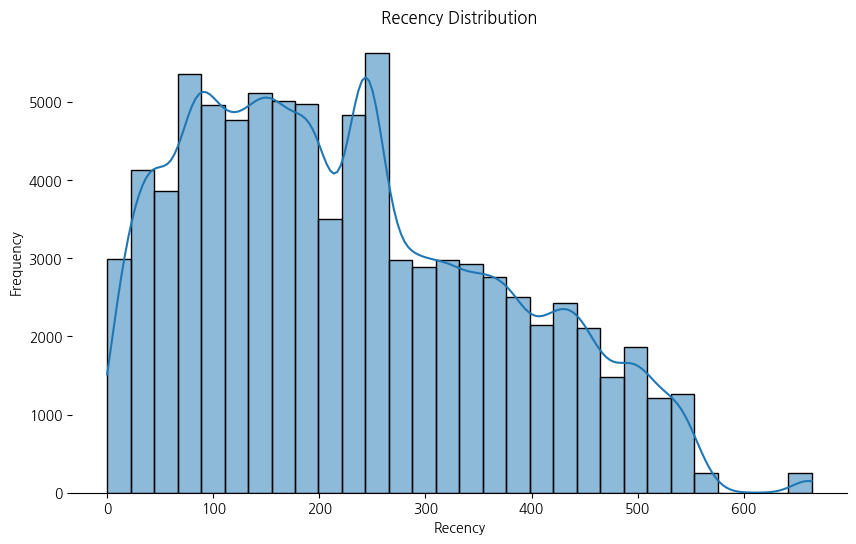

In [ ]:
# recency_df 분포 확인
fig,ax = plt.subplots(figsize=(10, 6))
sns.despine(left=True)
sns.histplot(recency_df['recency'], bins=30, kde=True)
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

# F 분석

- Frequency 구매 빈도
    - F지표 = 고객별 구매 횟수

In [ ]:
# Frequency 분석을 위한 데이터 추출
tmp = df[['주문 고유 ID', '고객 고유 ID']].drop_duplicates()
frequency_df = tmp.groupby('고객 고유 ID')['주문 고유 ID'].count().reset_index()

# 고객 고유 아이디로 그룹화 한다음 주문횟수를 구해야 한다.
# 여기서는 주문횟수를 주문 고유 ID 개수로 생각했으므로 주문 고유 ID에 count를 적용한다.
frequency_df = frequency_df.rename(columns={'주문 고유 ID':'Frequency'})
frequency_df.Frequency.describe()

count    85111.000000
mean         1.033403
std          0.207316
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         12.000000
Name: Frequency, dtype: float64

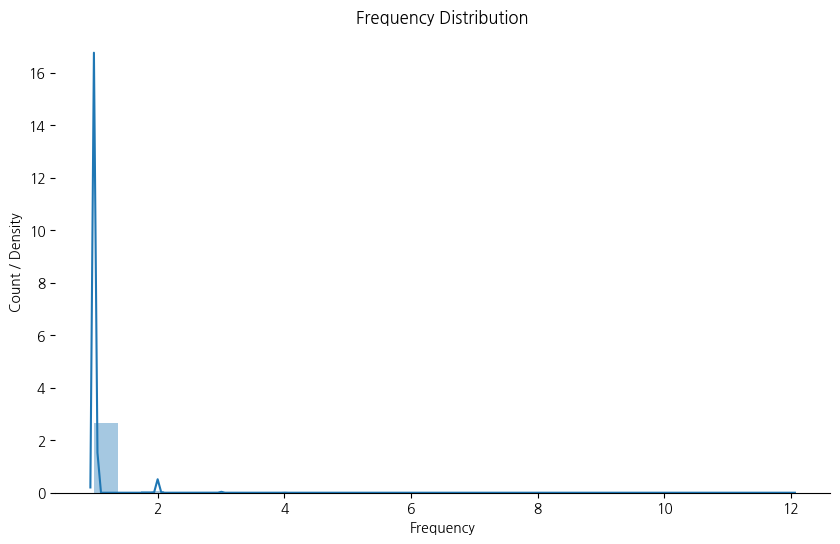

In [ ]:
# frequency_df 분포 확인
fig,ax = plt.subplots(figsize=(10, 6))
sns.despine(left=True)
sns.distplot(frequency_df['Frequency'], bins=30, kde=True)
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count / Density')
plt.show()

# M 분석

In [ ]:
# Monetary 분석을 위한 데이터 추출
monetary_df = df.groupby('고객 고유 ID')['총구매금액'].sum().reset_index()
monetary_df.rename(columns={'총구매금액' : 'monetary'},inplace=True)
monetary_df.monetary.describe()

count     85111.000000
mean        445.763462
std        6400.628990
min          10.070000
25%          64.620000
50%         116.360000
75%         221.735000
max      905120.000000
Name: monetary, dtype: float64

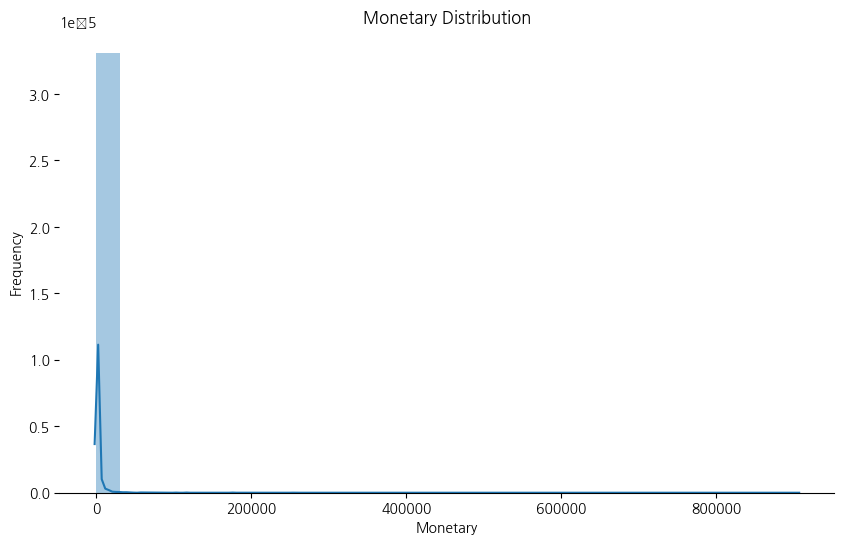

In [ ]:
# monetary_df 분포 확인
fig,ax = plt.subplots(figsize=(10, 6))
sns.despine(left=True)
sns.distplot(monetary_df['monetary'], bins=30, kde=True)
plt.title('Monetary Distribution')
plt.xlabel('Monetary')
plt.ylabel('Frequency')
plt.show()

# RFM 데이터 만들기

In [ ]:
# recency_df, frequency_df, monetary_df 조인해서 csv로 저장하기
rfm = pd.merge(recency_df, frequency_df, on='고객 고유 ID')
rfm = pd.merge(rfm, monetary_df, on='고객 고유 ID')
rfm.to_csv('rfm.csv', index=False)

# 재구매 고객에 대한 등급 세분화

- 1회 구매한 고객과 2회 이상 구매한 고객을 분류하여 각각 고객 등급 세분화를 진행해야 하므로 Frequency 값이 1인 데이터프레임과 2 이상인 데이터프레임을 만들어서 진행한다.
    - 여기서는 Frequency 값이 2 이상인 경우에 대해 등급 세분화를 진행한다.

In [ ]:
rfm_repurchase = rfm[rfm['Frequency'] >= 2]
rfm_repurchase = rfm_repurchase[['고객 고유 ID','recency','Frequency','monetary']]
rfm_repurchase.shape

(2558, 4)

## 데이터 전처리

### R지표 로그변환 + 스케일링

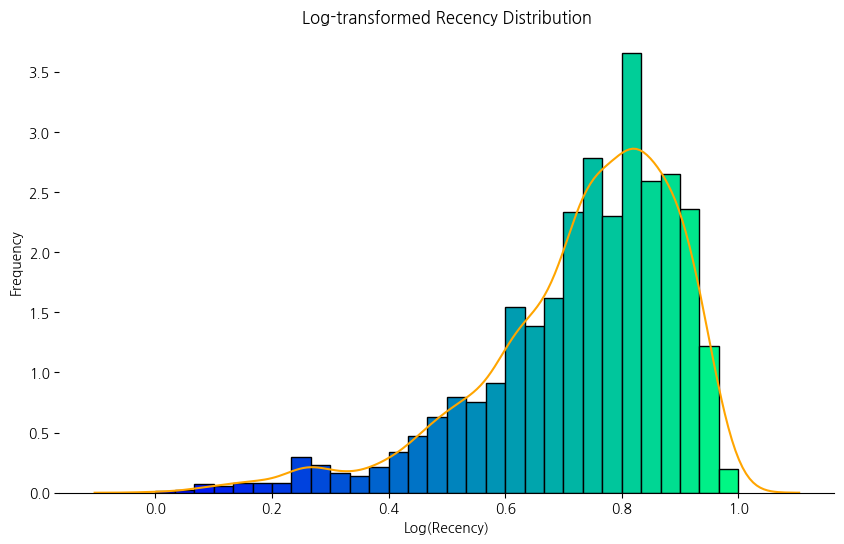

In [ ]:
# 로그변환
rfm_repurchase['recency_log'] = np.log1p(rfm_repurchase['recency'])

# MinMax 스케일링
scaler = MinMaxScaler()
rfm_repurchase['recency_log_norm'] = scaler.fit_transform(rfm_repurchase['recency_log'].values.reshape(-1,1))

# recency_log_norm 시각화
fig,ax = plt.subplots(figsize=(10, 6))
sns.despine(left=True)
n, bins, patches = plt.hist(rfm_repurchase['recency_log_norm'], bins=30, edgecolor='black', density=True)

# 'winter' 팔레트를 사용하여 각 막대 색상 설정
palette = sns.color_palette('winter', len(patches))
for color, patch in zip(palette, patches):
    patch.set_facecolor(color)

# KDE plot 추가
sns.kdeplot(rfm_repurchase['recency_log_norm'], color='orange', ax=ax)

plt.title('Log-transformed Recency Distribution')
plt.xlabel('Log(Recency)')
plt.ylabel('Frequency')
plt.show()

### F지표 로그변환 + 스케일링

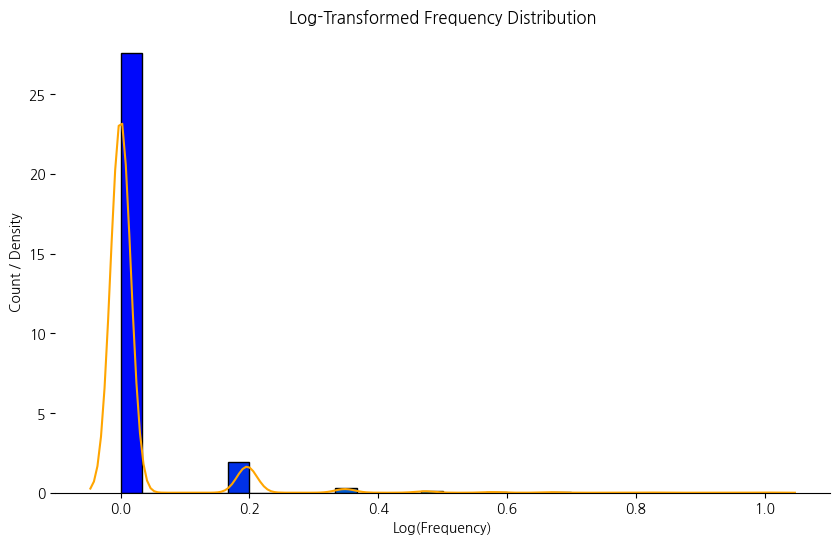

In [ ]:
# 로그 변환 적용
rfm_repurchase['frequency_log'] = np.log1p(rfm_repurchase['Frequency'])  # log(1 + Frequency) 적용

# MinMax 스케일링
rfm_repurchase['frequency_log_norm'] = scaler.fit_transform(rfm_repurchase['frequency_log'].values.reshape(-1,1))

# frequency_log_norm 시각화
fig,ax = plt.subplots(figsize=(10, 6))
sns.despine(left=True)
n, bins, patches = plt.hist(rfm_repurchase['frequency_log_norm'], bins=30, edgecolor='black', density=True)

# 'winter' 팔레트를 사용하여 각 막대 색상 설정
palette = sns.color_palette('winter', len(patches))
for color, patch in zip(palette, patches):
    patch.set_facecolor(color)

# KDE plot 추가
sns.kdeplot(rfm_repurchase['frequency_log_norm'], color='orange', ax=ax)

plt.title('Log-Transformed Frequency Distribution')
plt.xlabel('Log(Frequency)')
plt.ylabel('Count / Density')
plt.show()

### M지표 로그변환 + 스케일링

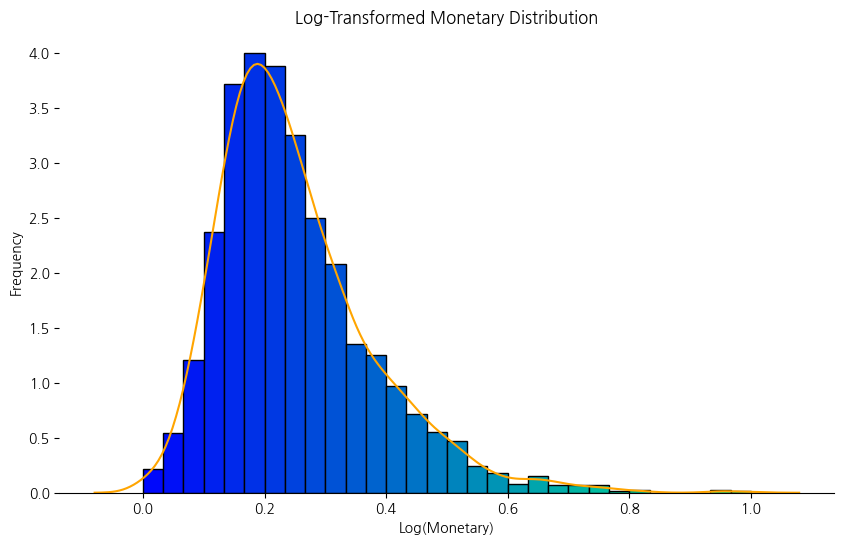

In [ ]:
# 로그변환
rfm_repurchase['monetary_log'] = np.log1p(rfm_repurchase['monetary'])

# MinMax 스케일링
rfm_repurchase['monetary_log_norm'] = scaler.fit_transform(rfm_repurchase['monetary_log'].values.reshape(-1,1))

# monetary_log_norm 시각화
fig,ax = plt.subplots(figsize=(10, 6))
sns.despine(left=True)
n, bins, patches = plt.hist(rfm_repurchase['monetary_log_norm'], bins=30, edgecolor='black', density=True)

# 'winter' 팔레트를 사용하여 각 막대 색상 설정
palette = sns.color_palette('winter', len(patches))
for color, patch in zip(palette, patches):
    patch.set_facecolor(color)

# KDE plot 추가
sns.kdeplot(rfm_repurchase['monetary_log_norm'], color='orange', ax=ax)

plt.title('Log-Transformed Monetary Distribution')
plt.xlabel('Log(Monetary)')
plt.ylabel('Frequency')
plt.show()

## 클러스터링

In [ ]:
rfm_log_scaled = rfm_repurchase[['recency_log_norm','frequency_log_norm', 'monetary_log_norm']]
rfm_log_scaled

,recency_log_norm,frequency_log_norm,monetary_log_norm
0,0.854569,0.000000,0.154663
12,0.532122,0.000000,0.182345
13,0.786362,0.000000,0.390611
40,0.919615,0.000000,0.159864
51,0.916127,0.196191,0.327415
...,...,...,...
81676,0.497638,0.000000,0.213725
81678,0.746997,0.000000,0.160397
81738,0.797543,0.000000,0.363983
83052,0.862379,0.000000,0.260354


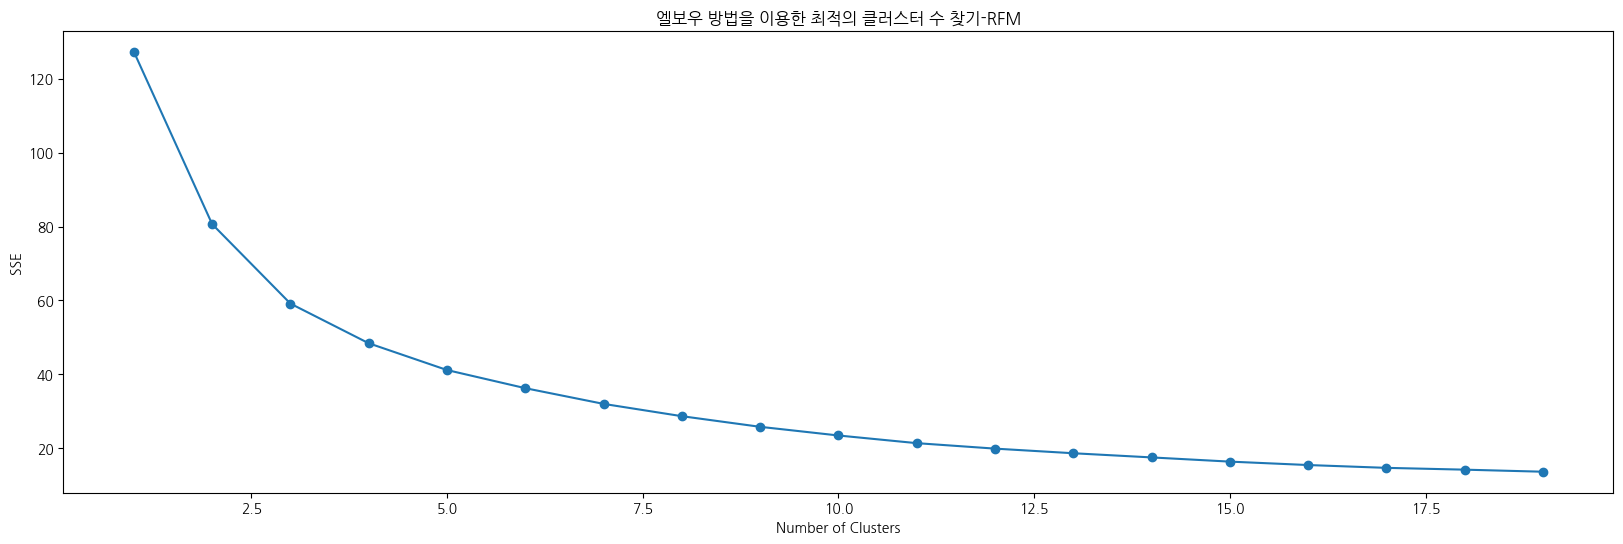

In [ ]:
# 엘보우 메소드를 활용하여 최적의 클러스터 수 구하기
sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_log_scaled)
    sse.append(kmeans.inertia_)

# 엘보우 그래프 시각화
plt.figure(figsize=(20, 6))
plt.plot(range(1, 20), sse, marker='o', linestyle='-')
plt.title('엘보우 방법을 이용한 최적의 클러스터 수 찾기-RFM')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

- 최적의 k는 4인 것을 확인

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
y_km = kmeans.fit_predict(rfm_log_scaled)
rfm_repurchase['RFM_Cluster'] = kmeans.labels_
rfm_repurchase.head()

,고객 고유 ID,recency,Frequency,monetary,recency_log,recency_log_norm,frequency_log,frequency_log_norm,monetary_log,monetary_log_norm,RFM_Cluster
0,CUSTOMER_Unique_60785,301,2,160.24,5.710427,0.854569,1.098612,0.000000,5.082894,0.154663,1
12,CUSTOMER_Unique_01788,52,2,207.51,3.970292,0.532122,1.098612,0.000000,5.339987,0.182345,2
13,CUSTOMER_Unique_62455,208,2,1441.62,5.342334,0.786362,1.098612,0.000000,7.274216,0.390611,0
40,CUSTOMER_Unique_01137,428,2,168.22,6.061457,0.919615,1.098612,0.000000,5.131200,0.159864,1
51,CUSTOMER_Unique_08998,420,3,801.15,6.042633,0.916127,1.386294,0.196191,6.687296,0.327415,0


In [ ]:
rfm_repurchase['Frequency'].unique()

array([ 2,  3,  6,  4,  5,  9, 12,  7])

## CV 계산

In [ ]:
import numpy as np

cv_r = rfm_repurchase.groupby('RFM_Cluster')['recency_log_norm'].std() / rfm_repurchase.groupby('RFM_Cluster')['recency_log_norm'].mean()
cv_f = rfm_repurchase.groupby('RFM_Cluster')['frequency_log_norm'].std() / rfm_repurchase.groupby('RFM_Cluster')['frequency_log_norm'].mean()
cv_m = rfm_repurchase.groupby('RFM_Cluster')['monetary_log_norm'].std() / rfm_repurchase.groupby('RFM_Cluster')['monetary_log_norm'].mean()

# CVrn, CVfn, CVmn을 전체 CV의 합으로 나누어 w1, w2, w3 계산
# R,F,M 각 지표의 중요도가 다르기 때문에 각 지표의 합으로 최소값 나눔
w1 = np.min(cv_r) / np.sum(cv_r)
w2 = np.min(cv_f) / np.sum(cv_f)
w3 = np.min(cv_m) / np.sum(cv_m)

# 모든 가중치의 합을 1로 만들기 위해 정규화
total_w = w1 + w2 + w3
W1 = w1 / total_w
W2 = w2 / total_w
W3 = w3 / total_w

print("최종 가중치 W1:", W1)
print("최종 가중치 W2:", W2)
print("최종 가중치 W3:", W3)

최종 가중치 W1: 0.23979996722300187
최종 가중치 W2: 0.37305124826654945
최종 가중치 W3: 0.3871487845104487


## RFM 스코어 계산

- R,M 지표는 비교적 고르게 분포한 것으로 보이나 F 지표는 재구매 빈도가 너무 낮아서 Frequency 지표 자체를 4등분 하여 범주화
    - 2회 구매 → 1
    - 3, 4회 구매 → 2
    - 5,6,7,8회 구매 → 3
    - 9회 이상 구매 → 4



In [ ]:
# 점수화
bins=8
rfm_repurchase['R_Score'] = pd.qcut(rfm_repurchase['recency_log_norm'], q=bins, labels=range(bins, 0, -1))
rfm_repurchase['F_Score'] = rfm_repurchase['Frequency'].apply(lambda x: 1 if x == 2 else 2 if 3 <= x <= 4 else 3 if 5 <= x <= 8 else 4)
rfm_repurchase['M_Score'] = pd.qcut(rfm_repurchase['monetary_log_norm'], q=bins, labels=range(1, bins+1))

rfm_repurchase['RFM_Score'] = (W1*rfm_repurchase['R_Score'].astype(float)/bins+ \
                               W2*rfm_repurchase['F_Score'].astype(float)/4+ \
                               W3*rfm_repurchase['M_Score'].astype(float)/bins)*100

In [ ]:
rfm_repurchase['R_Score'] = pd.to_numeric(rfm_repurchase['R_Score'], errors='coerce')
rfm_repurchase['M_Score'] = pd.to_numeric(rfm_repurchase['M_Score'], errors='coerce')

## 재구매 고객 등급 세분화

In [ ]:
rfm = rfm_repurchase[['고객 고유 ID','recency','Frequency','monetary','R_Score','F_Score','M_Score','RFM_Score']].copy()

In [ ]:
# RFM Score 상위 5%, 30%, 60% 퍼센타일 계산
rfm_05 = rfm['RFM_Score'].quantile(0.95)
rfm_25 = rfm['RFM_Score'].quantile(0.75)
rfm_60 = rfm['RFM_Score'].quantile(0.40)

def assign_segment(row):
    if row['RFM_Score'] >= rfm_05:
        return 'RedDiamond'
    elif row['RFM_Score'] >= rfm_25:
        return 'BlueDiamond'
    elif row['RFM_Score'] >= rfm_60:
        return 'PinkDiamond'
    else:
        return 'YellowDiamond'

# 고객 세분화 적용
rfm['Segment'] = rfm.apply(assign_segment, axis=1)

# 결과 확인
print(rfm[['RFM_Score', 'Segment']])

       RFM_Score        Segment
0      25.000000  YellowDiamond
12     47.824357    PinkDiamond
13     55.191798    BlueDiamond
40     22.002500  YellowDiamond
51     55.525581    BlueDiamond
...          ...            ...
81676  52.663717    PinkDiamond
81678  33.992499  YellowDiamond
81738  55.191798    BlueDiamond
83052  39.518079  YellowDiamond
84127  44.357439    PinkDiamond

[2558 rows x 2 columns]


In [ ]:
rfm.groupby('Segment').describe().T

Segment            BlueDiamond   PinkDiamond     RedDiamond  YellowDiamond
recency   count     525.000000    886.000000     130.000000    1017.000000
          mean      142.289524    204.805869      69.000000     264.179941
          std        89.590906    138.545538      48.693313     129.688133
          min         5.000000      4.000000       3.000000       2.000000
          25%        76.000000     91.000000      35.000000     168.000000
          50%       132.000000    173.000000      59.000000     250.000000
          75%       199.000000    305.750000      93.000000     362.000000
          max       550.000000    661.000000     246.000000     571.000000
Frequency count     525.000000    886.000000     130.000000    1017.000000
          mean        2.173333      2.053047       2.976923       2.019666
          std         0.426298      0.238893       1.527350       0.187206
          min         2.000000      2.000000       2.000000       2.000000
          25%         2.000000      2.000000       2.000000       2.000000
          50%         2.000000      2.000000       2.000000       2.000000
          75%         2.000000      2.000000       3.000000       2.000000
          max         5.000000      4.000000      12.000000       6.000000
monetary  count     525.000000    886.000000     130.000000    1017.000000
          mean     3798.131257    764.661343    7071.492308     175.425329
          std     22529.700386   1893.532583   23538.337307      85.141963
          min       193.940000    124.300000     458.370000      37.340000
          25%       579.110000    246.647500    1590.257500     109.930000
          50%       914.730000    372.055000    2321.895000     155.370000
          75%      1733.300000    604.917500    4426.977500     223.990000
          max    414072.520000  31355.520000  253325.910000     438.920000
R_Score   count     525.000000    886.000000     130.000000    1017.000000
          mean        5.628571      4.593679       7.153846       3.516224
          std         1.775884      2.344780       1.030252       2.040916
          min         1.000000      1.000000       3.000000       1.000000
          25%         4.000000      2.000000       7.000000       2.000000
          50%         6.000000      5.000000       7.000000       3.000000
          75%         7.000000      7.000000       8.000000       5.000000
          max         8.000000      8.000000       8.000000       8.000000
F_Score   count     525.000000    886.000000     130.000000    1017.000000
          mean        1.158095      1.049661       1.630769       1.015733
          std         0.370367      0.217367       0.738094       0.132170
          min         1.000000      1.000000       1.000000       1.000000
          25%         1.000000      1.000000       1.000000       1.000000
          50%         1.000000      1.000000       1.000000       1.000000
          75%         1.000000      1.000000       2.000000       1.000000
          max         3.000000      2.000000       4.000000       3.000000
M_Score   count     525.000000    886.000000     130.000000    1017.000000
          mean        6.822857      5.029345       7.730769       2.426745
          std         0.998592      1.638256       0.594398       1.286970
          min         3.000000      2.000000       6.000000       1.000000
          25%         6.000000      4.000000       8.000000       1.000000
          50%         7.000000      5.000000       8.000000       2.000000
          75%         8.000000      6.000000       8.000000       3.000000
          max         8.000000      8.000000       8.000000       5.000000
RFM_Score count     525.000000    886.000000     130.000000    1017.000000
          mean       60.690623     47.897802      74.064637      31.756782
          std         3.860631      4.014623       5.149213       6.556831
          min        55.191798     41.359940      69.023657      17.163141
          25%        57.5

## 시각화

### 등급별 고객 수

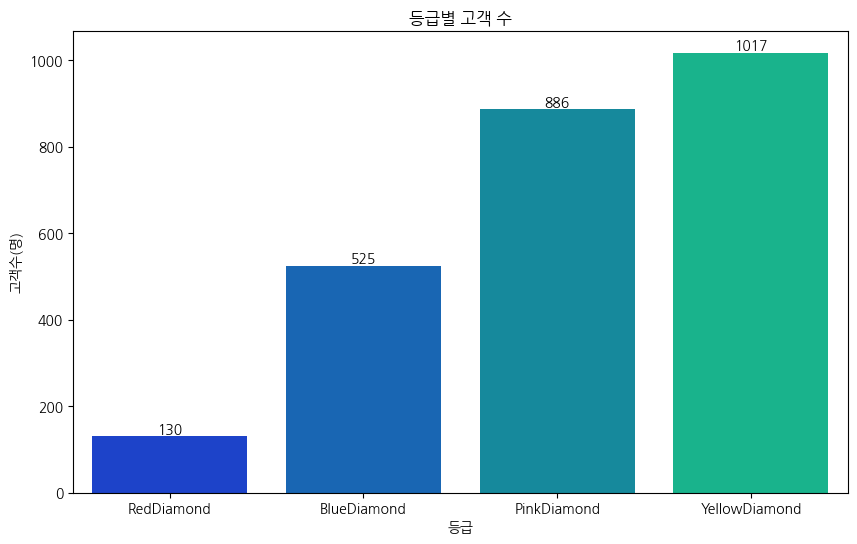

In [ ]:
order = ['RedDiamond', 'BlueDiamond', 'PinkDiamond', 'YellowDiamond']
rfm['Segment'] = pd.Categorical(rfm['Segment'], categories=order, ordered=True)

# 등급별 고객 수 시각화
plt.figure(figsize=(10, 6))
sns.countplot(x='Segment', data=rfm, hue='Segment', palette='winter')

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.title('등급별 고객 수')
plt.xlabel('등급')
plt.ylabel('고객수(명)')
plt.show()

### 등급별 총구매 금액

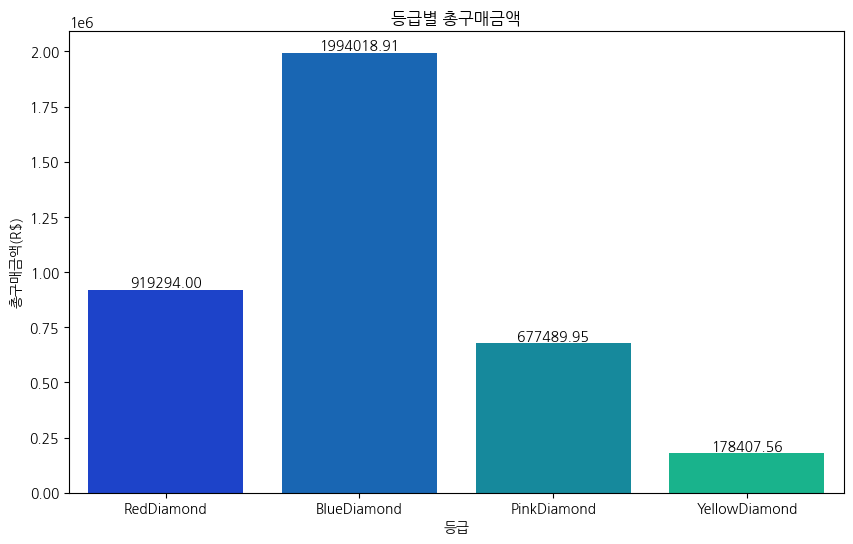

In [ ]:
# 등급별 총구매 금액
rfm_grouped = rfm.groupby('Segment')['monetary'].sum().reset_index()

# 등급별 총구매 금액 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='monetary', data=rfm_grouped, hue='Segment', palette='winter', ci=None)

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.title('등급별 총구매금액')
plt.xlabel('등급')
plt.ylabel('총구매금액(R$)')
plt.show()

### 등급별 1인 평균 구매 금액

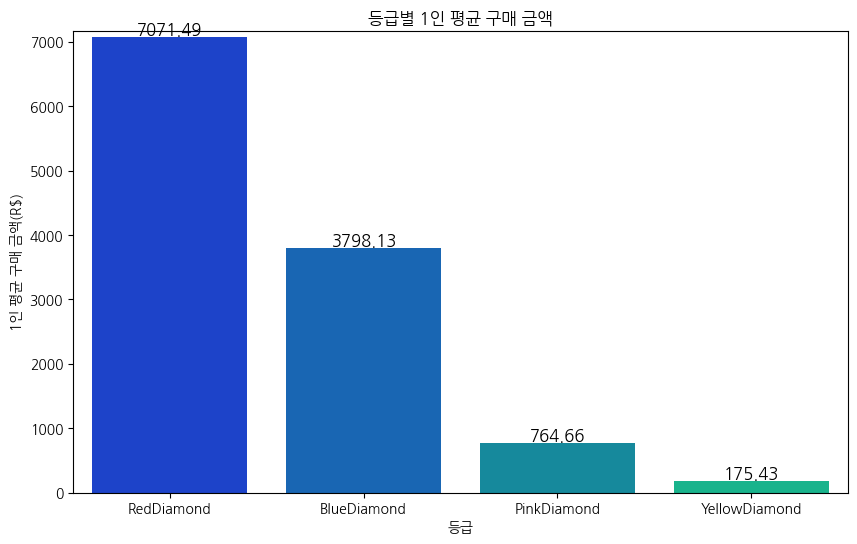

In [ ]:
# 등급별 총구매 금액 및 고객 수 계산
grouped_sales = rfm.groupby('Segment')['monetary'].agg(['sum', 'count']).reset_index()

# 고객 그룹 순서 지정
order = ['RedDiamond', 'BlueDiamond', 'PinkDiamond', 'YellowDiamond']

# 지정된 순서에 맞게 데이터프레임 정렬
sorted_grouped_sales = grouped_sales.set_index('Segment').loc[order].reset_index()

# 1인 평균 구매 금액 계산
sorted_grouped_sales['1인 평균 구매 금액'] = grouped_sales['sum'] / grouped_sales['count']

# 등급별 1인 평균 구매 금액 시각화
plt.figure(figsize=(10, 6))
bars = sns.barplot(x='Segment', y='1인 평균 구매 금액', data=sorted_grouped_sales, palette='winter')

for bar, avg_amount in zip(bars.patches, sorted_grouped_sales['1인 평균 구매 금액']):
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bar.get_height() + 0.5
    bars.text(text_x, text_y, f'{avg_amount:.2f}', ha='center', va='bottom', fontsize=12)

plt.title('등급별 1인 평균 구매 금액')
plt.xlabel('등급')
plt.ylabel('1인 평균 구매 금액(R$)')
plt.ylim(0, sorted_grouped_sales['1인 평균 구매 금액'].max() + 100)  # y축 범위 설정
plt.show()

### 등급별 총구매 금액 비중

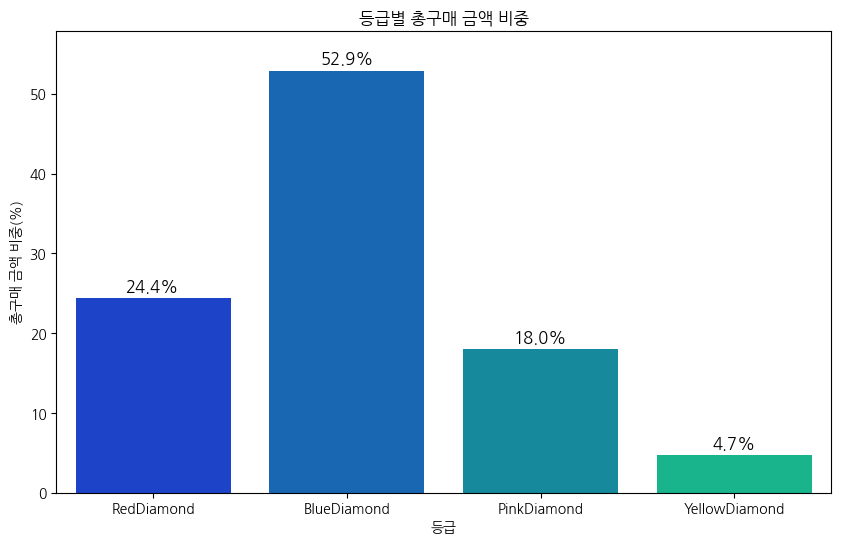

In [ ]:
# 등급별 총구매 금액 비중 계산
total_sales = rfm['monetary'].sum()
rfm_df_grouped = rfm.groupby('Segment', as_index=False)['monetary'].sum()
rfm_df_grouped['매출 백분율'] = rfm_df_grouped['monetary'] / total_sales * 100

rfm_df_grouped = rfm_df_grouped.set_index('Segment').loc[order].reset_index()

# 등급별 총구매 금액 비중 시각화
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=rfm_df_grouped['Segment'], y=rfm_df_grouped['매출 백분율'], palette='winter')

for bar, perc in zip(bars.patches, rfm_df_grouped['매출 백분율']):
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bar.get_height() + 0.5
    bars.text(text_x, text_y, f'{perc:.1f}%', ha='center', va='bottom', fontsize=12)

plt.title('등급별 총구매 금액 비중')
plt.xlabel('등급')
plt.ylabel('총구매 금액 비중(%)')
plt.ylim(0, rfm_df_grouped['매출 백분율'].max() + 5)  # y축 범위 설정
plt.show()

## ANOVA 분석 검증

- ANOVA 테이블 설명
    - C(Segment_2) : 독립 변수 Segment_2가 설명하는 제곱합
    - Residual : 잔차 (오차) 제곱합
    - sum_sq(Sum of Squares) : 각 소스의 제곱합
    - df : 자유도
        - C(Segment_2)의 자유도 : 범주의 수-1
        - Residual의 자유도 : 전체 관측치 수 - 범주의 수
    - F : F-통계량
        - 각 요인이 모델의 변동을 얼마나 잘 설명하는지를 나타낸다
    - PR(>F) : p-값
        - F-통계량이 얼마나 유의미한지를 나타낸다. 일반적으로 p-값이 0.05보다 작으면 유의미하다고 판단한다.

In [ ]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

### 각 스코어에 대한 검증

In [40]:
# R_Score와 Segment_2 간의 ANOVA 분석
model_r = ols('R_Score ~ C(Segment)', data=rfm).fit()
anova_table_r = sm.stats.anova_lm(model_r, typ=2)

# F_Score와 Segment_2 간의 ANOVA 분석
model_f = ols('F_Score ~ C(Segment)', data=rfm).fit()
anova_table_f = sm.stats.anova_lm(model_f, typ=2)

# M_Score와 Segment_2 간의 ANOVA 분석
model_m = ols('M_Score ~ C(Segment)', data=rfm).fit()
anova_table_m = sm.stats.anova_lm(model_m, typ=2)

# RFM_Score와 Segment_2 간의 ANOVA 분석
model_rfm = ols('RFM_Score ~ C(Segment)', data=rfm).fit()
anova_table_rfm = sm.stats.anova_lm(model_rfm, typ=2)

In [ ]:
# ANOVA 결과 출력
print("R_Score ANOVA 결과")
display(anova_table_r)
print("\nF_Score ANOVA 결과")
display(anova_table_f)
print("\nM_Score ANOVA 결과")
display(anova_table_m)
print("\nRFM_Score ANOVA 결과")
display(anova_table_rfm)

R_Score ANOVA 결과


,sum_sq,df,F,PR(>F)
C(Segment),2576.142216,3.0,201.44348,2.891153e-117
Residual,10887.201411,2554.0,NaN,NaN



F_Score ANOVA 결과


,sum_sq,df,F,PR(>F)
C(Segment),47.490952,3.0,200.431251,9.855537e-117
Residual,201.718196,2554.0,NaN,NaN



M_Score ANOVA 결과


,sum_sq,df,F,PR(>F)
C(Segment),8809.367815,3.0,1621.161732,0.0
Residual,4626.132185,2554.0,NaN,NaN



RFM_Score ANOVA 결과


,sum_sq,df,F,PR(>F)
C(Segment),424388.846123,3.0,5223.013653,0.0
Residual,69173.928124,2554.0,NaN,NaN


### Recency, Frequency, Monetary에 대한 검증

In [42]:
# Recency에 대한 ANOVA
anova_recency = ols('recency ~ C(Segment)', data=rfm).fit()
anova_recency = sm.stats.anova_lm(anova_recency, typ=2)

# Frequency에 대한 ANOVA
anova_frequency = ols('Frequency ~ C(Segment)', data=rfm).fit()
anova_frequency = sm.stats.anova_lm(anova_frequency, typ=2)

# Monetary에 대한 ANOVA
anova_monetary = ols('monetary ~ C(Segment)', data=rfm).fit()
anova_monetary = sm.stats.anova_lm(anova_monetary, typ=2)

In [43]:
# ANOVA 결과 출력
print('Recency ANOVA')
display(anova_recency)

print('Frequency ANOVA')
display(anova_frequency)

print('Monetary ANOVA')
display(anova_monetary)

Recency ANOVA


,sum_sq,df,F,PR(>F)
C(Segment),7.996311e+06,3.0,176.418644,6.021102e-104
Residual,3.858734e+07,2554.0,NaN,NaN


Frequency ANOVA


,sum_sq,df,F,PR(>F)
C(Segment),110.975783,3.0,195.901068,2.418736e-114
Residual,482.270894,2554.0,NaN,NaN


Monetary ANOVA


,sum_sq,df,F,PR(>F)
C(Segment),9.069746e+09,3.0,22.667985,1.758640e-14
Residual,3.406292e+11,2554.0,NaN,NaN
